# 自己相関を算出

In [76]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import math
import datetime
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

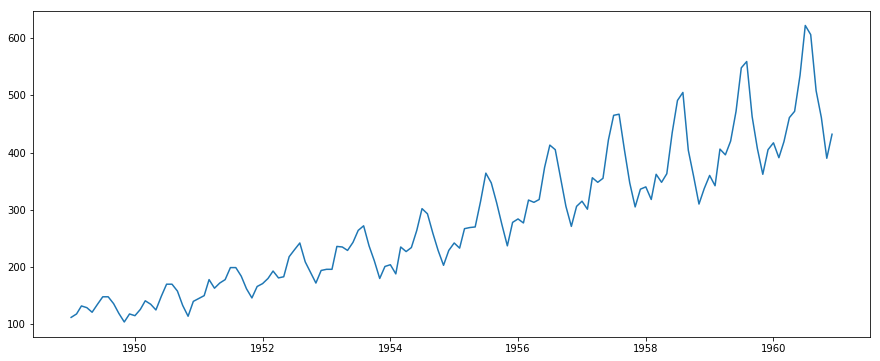

In [77]:
# 日付形式で読み込む
data = pd.read_csv('../01_input/AirPassengers.csv', index_col='Month', parse_dates=True, dtype='float')
ts = data['#Passengers'] 
ts.head()

# プロット
plt.plot(ts)

In [78]:
data.columns

Index(['#Passengers'], dtype='object')

In [79]:
data.head(3)

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0


In [80]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [81]:
data.shape

(144, 1)

## データの確認

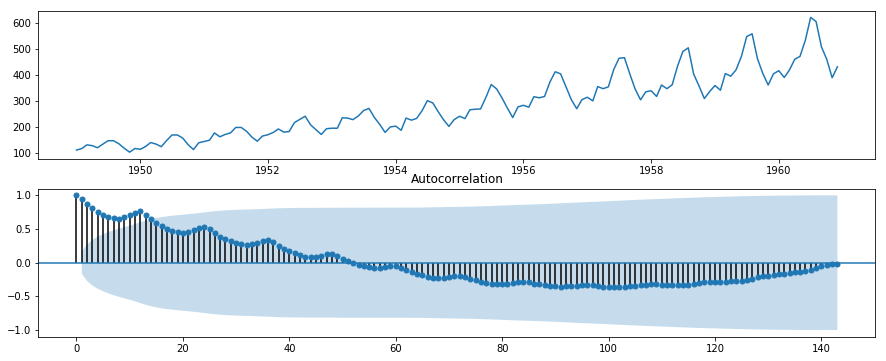

In [82]:
# 対数系列
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(ts)

#　対数系列（自己相関）
ax2 = fig.add_subplot(2, 1, 2)
sm.graphics.tsa.plot_acf(ts,ax=ax2)

plt.show()

In [83]:
# 自己相関係数の出力
passengers_acf = sm.tsa.stattools.acf(ts, nlags=144) #ラグ=40(デフォルト値)、省略可能
passengers_acf

array([ 1.00000000e+00,  9.48047341e-01,  8.75574835e-01,  8.06681155e-01,
        7.52625417e-01,  7.13769973e-01,  6.81733603e-01,  6.62904386e-01,
        6.55610484e-01,  6.70948328e-01,  7.02719921e-01,  7.43240189e-01,
        7.60395042e-01,  7.12660870e-01,  6.46342279e-01,  5.85923424e-01,
        5.37955191e-01,  4.99747526e-01,  4.68734013e-01,  4.49870665e-01,
        4.41628796e-01,  4.57223757e-01,  4.82482030e-01,  5.17126988e-01,
        5.32189830e-01,  4.93975694e-01,  4.37721337e-01,  3.87602900e-01,
        3.48025032e-01,  3.14983879e-01,  2.88496819e-01,  2.70801867e-01,
        2.64290106e-01,  2.76799337e-01,  2.98521495e-01,  3.25587117e-01,
        3.37023599e-01,  3.03334859e-01,  2.53977081e-01,  2.10655338e-01,
        1.72170924e-01,  1.38400407e-01,  1.11403241e-01,  9.09845262e-02,
        8.21717704e-02,  8.87722191e-02,  1.03869577e-01,  1.23930824e-01,
        1.32634564e-01,  1.03747230e-01,  6.20980459e-02,  2.88065036e-02,
       -8.10514322e-04, -

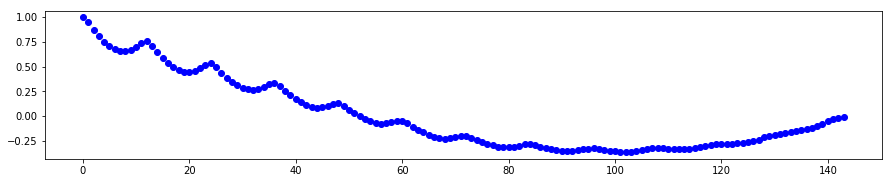

In [84]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(passengers_acf, 'bo')

## 自己相関係数を手計算

In [99]:
# 自己相関係数を計算Numpy利用）

LAG = 143 # 計算ラグ数
rk = np.zeros(LAG+1) # 自己相関係数の計算結果を保持用
y = np.array(ts) # 乗客数データのndarray作成（計算用）
y_mean = np.mean(y) # 乗客数の平均値

print(y_mean)

280.2986111111111


In [100]:
print(y)
print(rk)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [101]:
# ラグ0の自己相関係数：1.0
rk[0] = np.sum((y - y_mean)**2) / np.sum((y - y_mean)**2) 

# ラグ1〜40の自己相関係数：-1.0〜1.0
for k in np.arange(1, LAG+1): 
    rk[k] = np.sum((y[k:] - y_mean)*(y[:-k] - y_mean)) / np.sum((y - y_mean)**2)

print(rk) # -> acf()結果と同じ

[ 1.00000000e+00  9.48047341e-01  8.75574835e-01  8.06681155e-01
  7.52625417e-01  7.13769973e-01  6.81733603e-01  6.62904386e-01
  6.55610484e-01  6.70948328e-01  7.02719921e-01  7.43240189e-01
  7.60395042e-01  7.12660870e-01  6.46342279e-01  5.85923424e-01
  5.37955191e-01  4.99747526e-01  4.68734013e-01  4.49870665e-01
  4.41628796e-01  4.57223757e-01  4.82482030e-01  5.17126988e-01
  5.32189830e-01  4.93975694e-01  4.37721337e-01  3.87602900e-01
  3.48025032e-01  3.14983879e-01  2.88496819e-01  2.70801867e-01
  2.64290106e-01  2.76799337e-01  2.98521495e-01  3.25587117e-01
  3.37023599e-01  3.03334859e-01  2.53977081e-01  2.10655338e-01
  1.72170924e-01  1.38400407e-01  1.11403241e-01  9.09845262e-02
  8.21717704e-02  8.87722191e-02  1.03869577e-01  1.23930824e-01
  1.32634564e-01  1.03747230e-01  6.20980459e-02  2.88065036e-02
 -8.10514322e-04 -2.79620172e-02 -5.27862768e-02 -7.08251500e-02
 -7.96632163e-02 -7.48314809e-02 -6.37270762e-02 -5.13856725e-02
 -4.69336227e-02 -7.42208

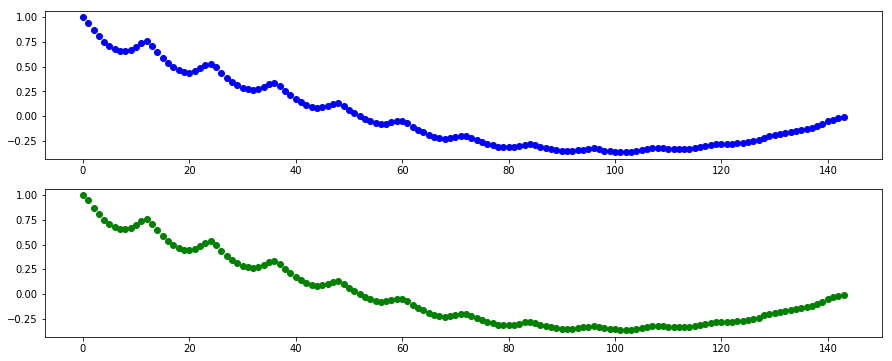

In [163]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(passengers_acf, 'bo')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(rk, 'bo', color='green')